In [21]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# 1/ Load the data
FILE = "001MoDe_R1.csv"
# Load full dataset
full_data = np.genfromtxt(FILE, delimiter=';', skip_header=3, names=True)
# Keep only the useful columns
blank = full_data[['timestamp', 'mouseX', 'mouseY', 'mouseInTarget']]
# Center coordinates reference
CENTER_X = 552
CENTER_Y = 330

In [23]:
# 2. Print screen information 
# Read only the first line
with open(FILE, "r", encoding="utf-8") as f:
    first_line = f.readline().strip()

# Split into columns
columns = first_line.split(";")

In [24]:
# 3. Defining rounds

def process_round(data_slice):
    """Return centered X, centered Y and time in seconds for a data segment."""
    Xc = data_slice['mouseX'] - CENTER_X
    Yc = data_slice['mouseY'] - CENTER_Y

    t0 = data_slice['timestamp'][0]
    T_s = (data_slice['timestamp'] - t0) / 1000  # ms → sec

    return T_s, Xc, Yc, data_slice['mouseInTarget']


round_indices = [
    (0, 3972),
    (3974, 7871),
    (7872, 11770),
    (11771, 15655),
    (15657, len(blank))
]

rounds = [process_round(blank[start:end]) for start, end in round_indices]

In [25]:
# 4. Display graphs for each round
def plot_round(T, X, Y, target, round_number):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    ax1.plot(T, X)
    ax1.set_ylabel("X Centered")
    ax1.set_title(f"Round {round_number} – X over Time")
    ax1.grid(True)

    ax2.plot(T, -Y, color='orange')
    ax2.set_ylabel("Y Centered")
    ax2.set_title(f"Round {round_number} – Y over Time")
    ax2.grid(True)

    ax3.plot(T, target, color='green')
    ax3.set_xlabel("Time (s)")
    ax3.set_ylabel("Mouse In Target")
    ax3.set_title(f"Round {round_number} – Target")
    ax3.grid(True)

    plt.show()

screenWidth 1104
centerX 552
centerY 330
externalRadius 250
internalRadius 170
borderRadius 1
cursorRadius 16
indexOfDifficulty 28.00696429476858
taskRadius 209.5
taskTolerance 47
borderColor java.awt.Color[r=255,g=255,b=255]
backgroundColor java.awt.Color[r=0,g=0,b=0]
cursorColorRecord java.awt.Color[r=255,g=0,b=0]
cursorColorWait java.awt.Color[r=255,g=255,b=0]
autoStart 3600
cycleMaxNumber 6
cycleDuration 20
software LSL-mouse
version 1.2.0rc5
task CircularTarget
isWithLSL false


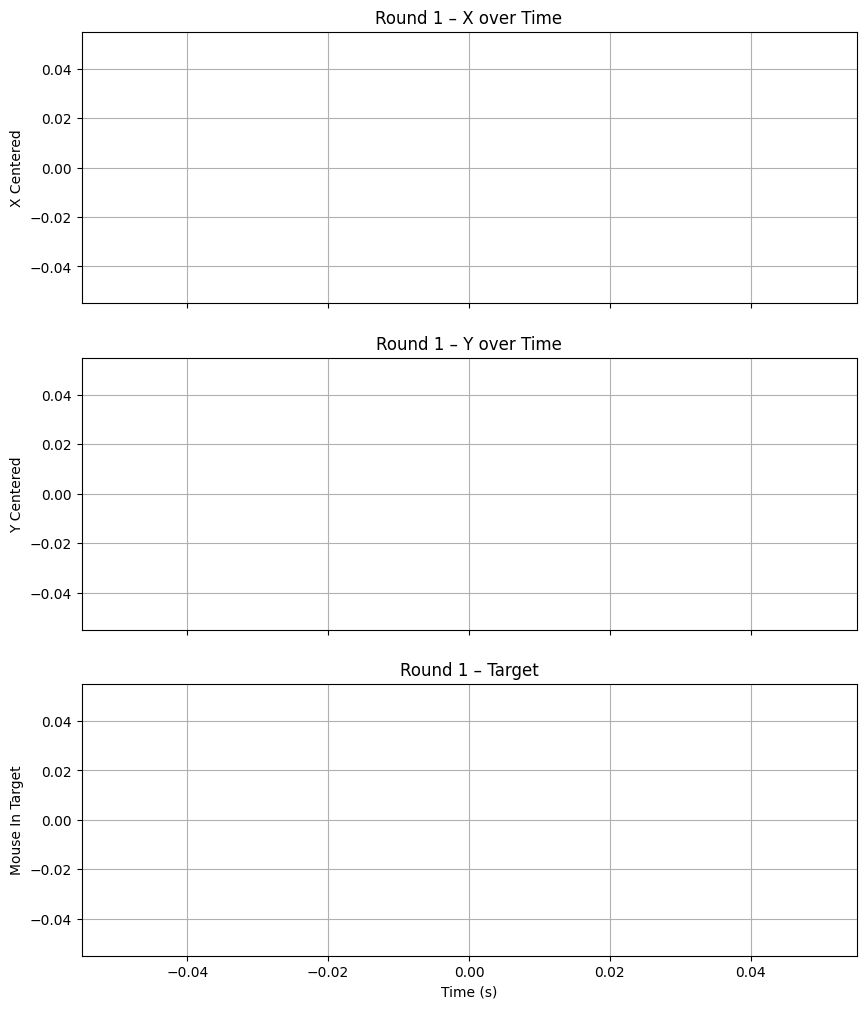

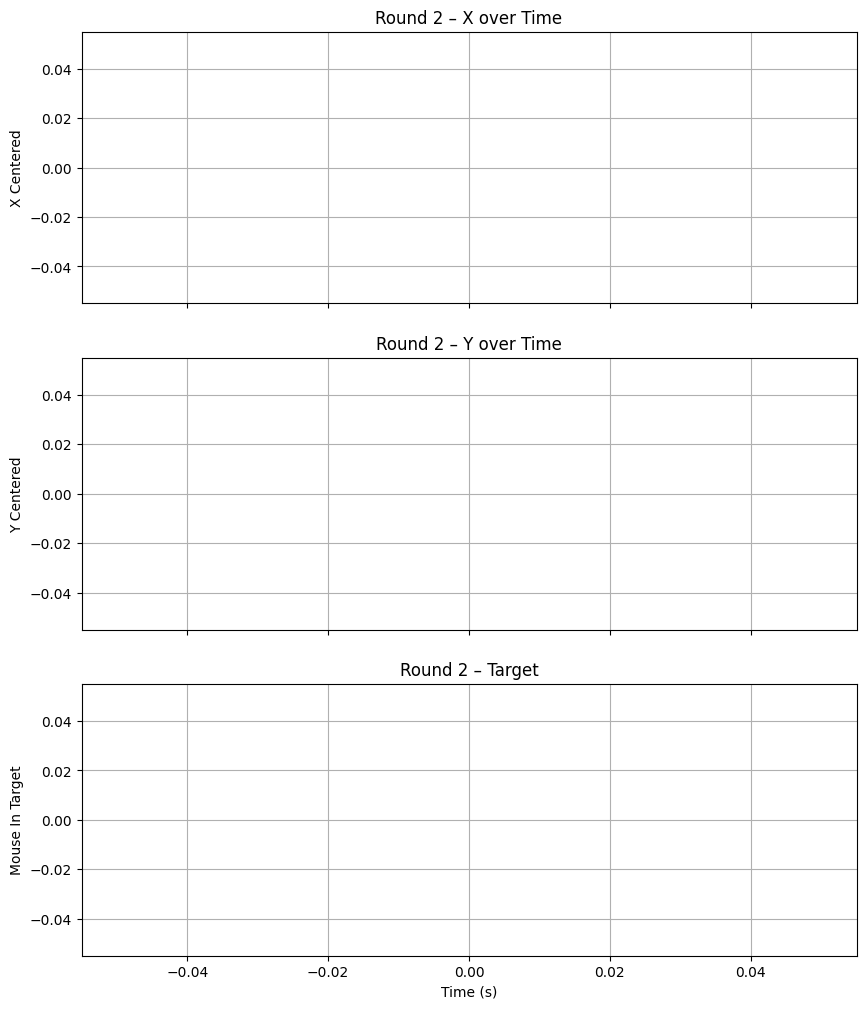

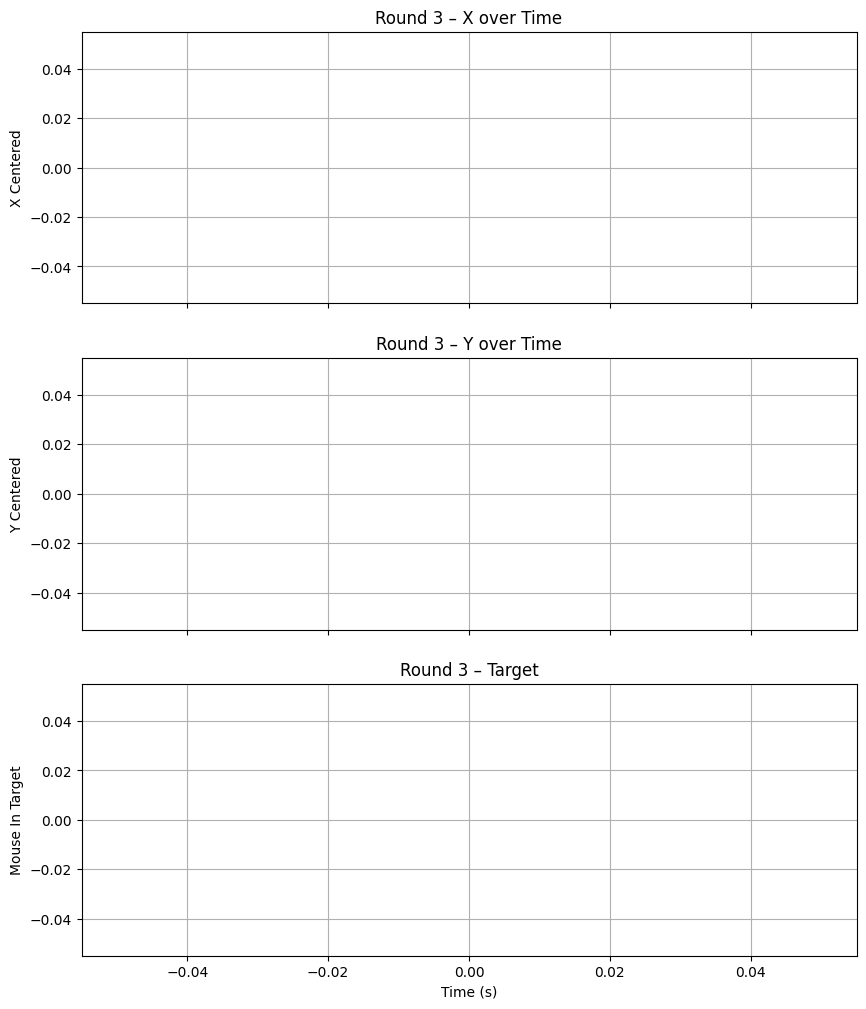

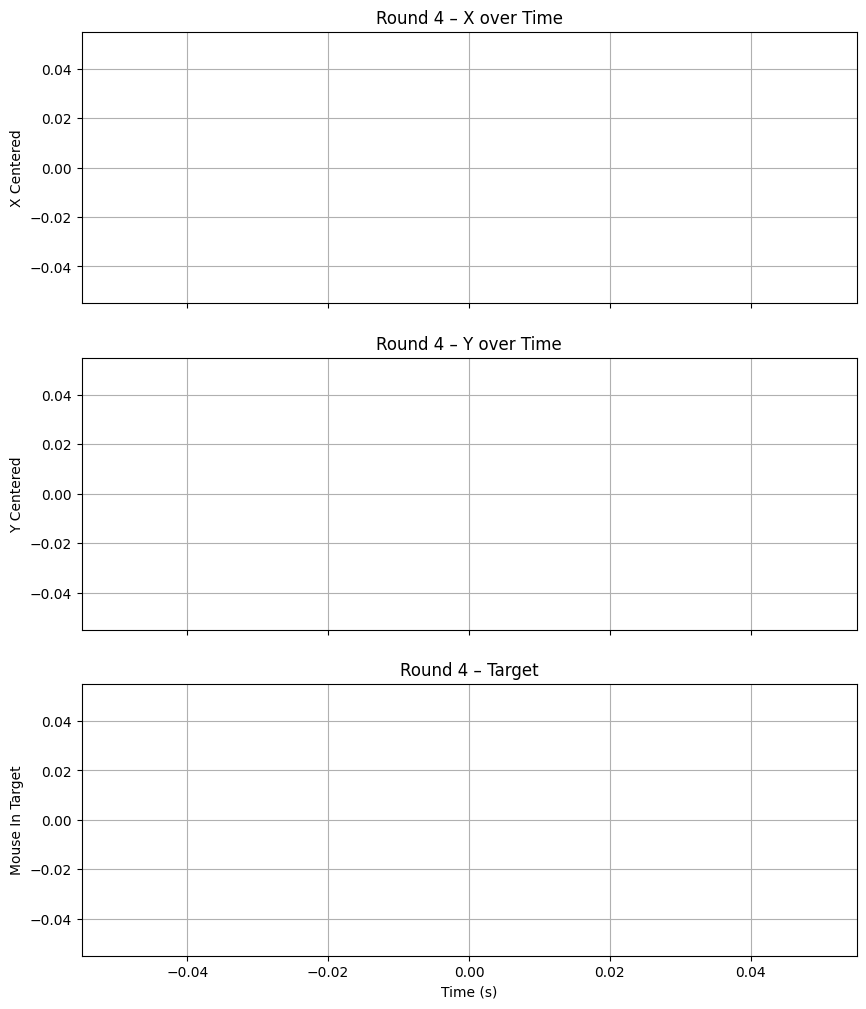

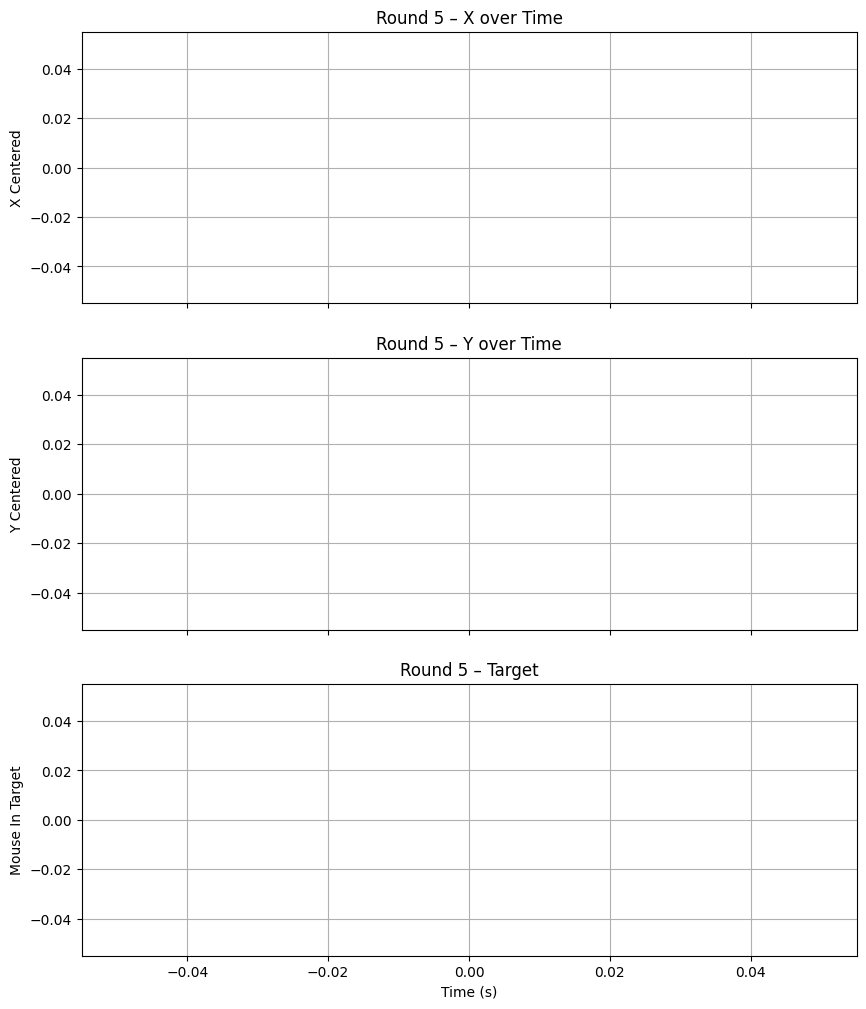

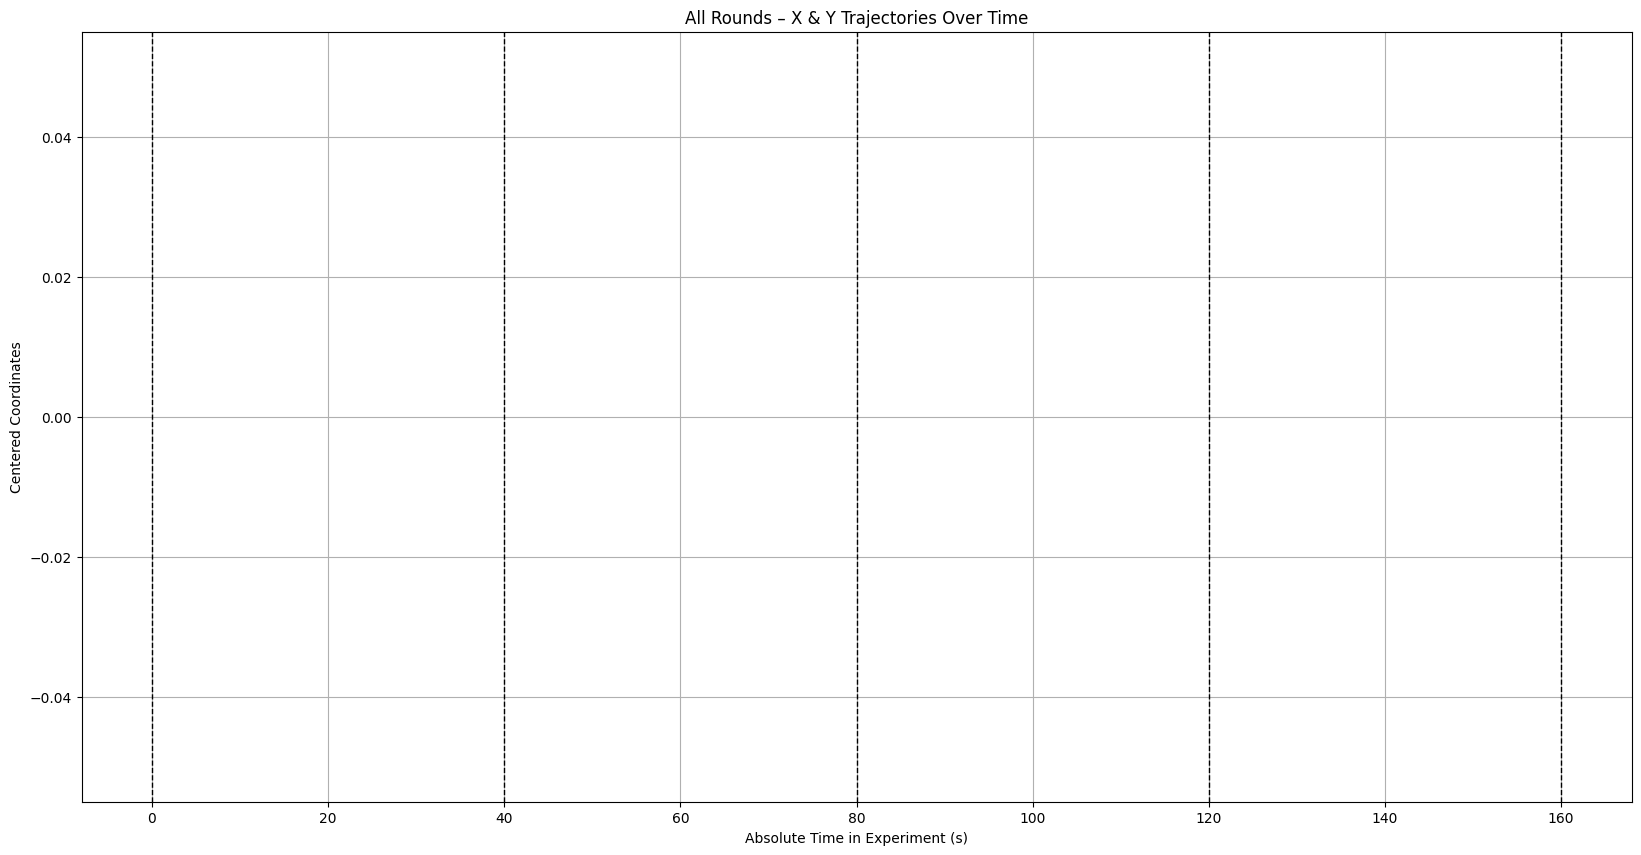

In [26]:
# Print each column vertically
for col in columns:
    print(col)
    
# 5. Display all curves in the same graph
for i, (T, X, Y, trg) in enumerate(rounds, start=1):
    plot_round(T, X, Y, trg, i)

# Define offsets for each round (seconds)
start_offsets = [0, 40, 80, 120, 160]

fig, ax = plt.subplots(figsize=(20, 10))

for (T, X, Y, trg), offset in zip(rounds, start_offsets):

    # Relative time for smooth alignment
    T_rel = T - T[0]
    T_plot = T_rel + offset

    ax.plot(T_plot, X, color="blue", alpha=0.8)
    ax.plot(T_plot, -Y, color="orange", alpha=0.8)

    # Round boundaries
    ax.axvline(offset, color="black", ls="--", lw=1)
    ax.axvline(offset + (T_rel[-1]), color="red", ls="--", lw=1)

ax.set_xlabel("Absolute Time in Experiment (s)")
ax.set_ylabel("Centered Coordinates")
ax.set_title("All Rounds – X & Y Trajectories Over Time")
ax.grid(True)

plt.show()
